신경망 케라스
==

다루는 내용
--
- MNIST 필기체 인식
- 단층 및 다층 신경망
- CNN


아래 모듈 설치는 한 번만 수행
--

In [ ]:
!pip install tensorflow

In [1]:
!pip install keras

In [2]:
import keras
import numpy as np
import pandas as pd

Using TensorFlow backend.
/Users/hwa-jongkim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## MNIST 데이터 로드

In [3]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()
 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### 데이터 보기

[5 0 4 1 9 2 1 3 1 4]


<Figure size 432x288 with 0 Axes>

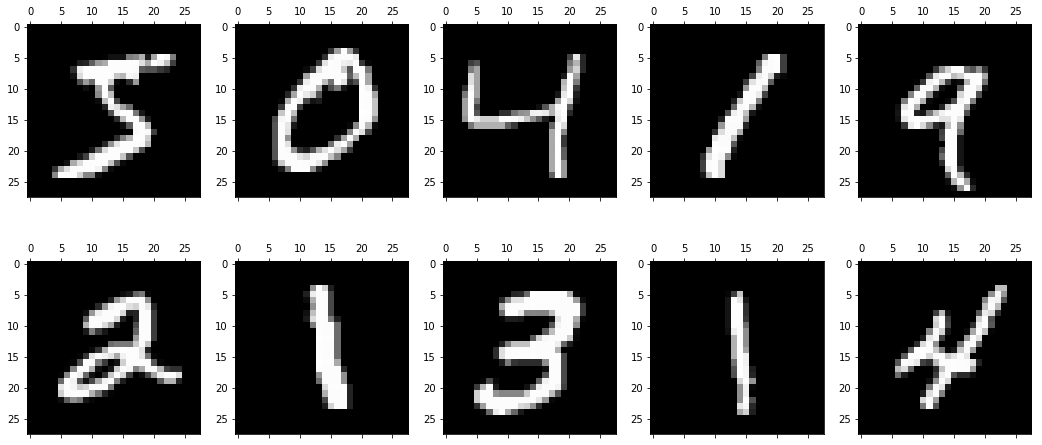

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

print(y_train[0:10])

figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## 전처리

In [5]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [6]:
from keras.utils import to_categorical

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape, y_test_hot.shape)

(60000, 10) (10000, 10)


## 단층 신경망

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import RandomUniform
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(units=10,
                kernel_initializer=RandomUniform(minval=0.0, maxval=0.001),
                input_shape=(28 * 28,)))
model.add(Activation('sigmoid'))

optimizers = SGD(lr=0.00001)
model.compile(optimizer=optimizers,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(X_train,
          y_train_hot,
          epochs=20,
          validation_data=(X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 44us/step - loss: 2.3022 - acc: 0.1749 - val_loss: 2.3013 - val_acc: 0.1625
Epoch 2/20
60000/60000 [==============================] - 2s 38us/step - loss: 1.9375 - acc: 0.1386 - val_loss: 1.0546 - val_acc: 0.1137
Epoch 3/20
60000/60000 [==============================] - 2s 39us/step - loss: 1.0359 - acc: 0.1135 - val_loss: 1.0049 - val_acc: 0.1150
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 1.0021 - acc: 0.1166 - val_loss: 0.9939 - val_acc: 0.1192
Epoch 5/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.9897 - acc: 0.1207 - val_loss: 0.9751 - val_acc: 0.1180
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.9822 - acc: 0.1252 - val_loss: 0.9804 - val_acc: 0.1244
Epoch 7/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.9777 - acc: 0.1300 - val_loss: 0.9810 - val_acc

In [9]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

result = pd.DataFrame({'actual': y_test, 'predict': predictions})

accuracy = (result['actual'] == result['predict']).mean()
print("Accuracy = {0:.6f}".format(accuracy))
      
result.head(10)

Accuracy = 0.919900


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


## 다층 신경망

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import RandomUniform
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(units=1000,
                kernel_initializer=RandomUniform(minval=-0.058, maxval=0.058),
                input_shape=(28 * 28,)))
model.add(Activation('sigmoid'))
model.add(Dense(units=10,
                kernel_initializer=RandomUniform(minval=-0.077, maxval=0.077)))

model.add(Activation('sigmoid'))

optimizers = SGD(lr=0.0001)
model.compile(optimizer=optimizers,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(X_train,
          y_train_hot,
          epochs=30,
#           epochs=100,
          validation_data=(X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 18s 301us/step - loss: 2.1729 - acc: 0.2294 - val_loss: 1.9904 - val_acc: 0.4127
Epoch 2/30
60000/60000 [==============================] - 17s 287us/step - loss: 1.8016 - acc: 0.5373 - val_loss: 1.5914 - val_acc: 0.6423
Epoch 3/30
60000/60000 [==============================] - 18s 294us/step - loss: 1.4082 - acc: 0.6950 - val_loss: 1.2283 - val_acc: 0.7458
Epoch 4/30
60000/60000 [==============================] - 16s 266us/step - loss: 1.1138 - acc: 0.7676 - val_loss: 0.9969 - val_acc: 0.7920
Epoch 5/30
60000/60000 [==============================] - 17s 280us/step - loss: 0.9300 - acc: 0.8049 - val_loss: 0.8521 - val_acc: 0.8190
Epoch 6/30
60000/60000 [==============================] - 15s 257us/step - loss: 0.8100 - acc: 0.8276 - val_loss: 0.7544 - val_acc: 0.8398
Epoch 7/30
60000/60000 [==============================] - 16s 262us/step - loss: 0.7260 - acc: 0.8437 - val_loss: 0.

In [12]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

result = pd.DataFrame({'actual': y_test, 'predict': predictions})

accuracy = (result['actual'] == result['predict']).mean()
print("Accuracy = {0:.6f}".format(accuracy))
      
result.head(10)

Accuracy = 0.909100


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


## CNN

In [13]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=6,
                 kernel_initializer='random_uniform',
                 activation='sigmoid',
                 kernel_size=(5, 5),
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2)))

model.add(Conv2D(filters=12,
                 kernel_initializer='random_uniform',
                 activation='sigmoid',
                 kernel_size=(5, 5)))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128,
                kernel_initializer='random_uniform',
                activation='sigmoid'))
model.add(Dense(units=10,
                kernel_initializer='random_uniform',
                activation='sigmoid'))

from keras.optimizers import SGD

optimizer = SGD(lr=0.1)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(X_train,
          y_train_hot,
          epochs=10,
#           epochs=30,
          validation_data=(X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 36s 594us/step - loss: 2.3026 - acc: 0.1105 - val_loss: 2.3002 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 30s 498us/step - loss: 2.2317 - acc: 0.1737 - val_loss: 1.2783 - val_acc: 0.7172
Epoch 3/10
60000/60000 [==============================] - 28s 459us/step - loss: 0.4817 - acc: 0.8645 - val_loss: 0.2495 - val_acc: 0.9251
Epoch 4/10
60000/60000 [==============================] - 28s 467us/step - loss: 0.2163 - acc: 0.9365 - val_loss: 0.1601 - val_acc: 0.9521
Epoch 5/10
60000/60000 [==============================] - 29s 489us/step - loss: 0.1573 - acc: 0.9541 - val_loss: 0.1233 - val_acc: 0.9618
Epoch 6/10
60000/60000 [==============================] - 32s 526us/step - loss: 0.1285 - acc: 0.9615 - val_loss: 0.1200 - val_acc: 0.9630
Epoch 7/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1155 - acc: 0.9649 - val_loss: 0.09

In [16]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

result = pd.DataFrame({'actual': y_test, 'predict': predictions})

accuracy = (result['actual'] == result['predict']).mean()
print("Accuracy = {0:.6f}".format(accuracy))
      
result.head(10)

Accuracy = 0.975800


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9
